In [1]:
from pyEDM import *
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import os
import geopandas as gpd
from shapely.geometry import Polygon
import rasterio
import xarray as xr
from mpl_toolkits.axes_grid1 import make_axes_locatable
import fiona
import rasterio.mask
from descartes import PolygonPatch
from rasterio.plot import show
from tqdm import tqdm
import datetime
import random
from sklearn.preprocessing import StandardScaler
import scipy.stats
from random import sample, shuffle
import seaborn as sns
from scipy import stats

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
observations_tables = '/home/rgreen/tana-crunch/rgreen/crunch/DroughtEDM/Data/observations_tables/'

In [4]:
ndvi_anom_dek_dir = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/eMODIS_NDVI/Anomaly_Dek/'

In [5]:
ndvi_mean_dek_dir = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/eMODIS_NDVI/Mean_Dek/'

In [6]:
precip_anom_dek_dir = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/CHIRPS/Anomaly_Dek/'
precip_mean_dek_dir = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/CHIRPS/Mean_Dek/'
temp_anom_dek_dir = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/LST/Anomaly_Dek/'
temp_mean_dek_dir = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/LST/Mean_Dek/'

In [7]:
ndvi_table = pd.read_csv(observations_tables + 'ndvi_table_origT.csv', delimiter=',', engine='c', low_memory=False, index_col=[0])

In [8]:
precip_table = pd.read_csv(observations_tables + 'precip_table_origT.csv', delimiter=',', engine='c', low_memory=False, index_col=[0])

In [9]:
temp_table = pd.read_csv(observations_tables + 'temp_table_origT.csv', delimiter=',', engine='c', low_memory=False, index_col=[0])

In [11]:
ndvi_table1 = (ndvi_table-100)/100

In [12]:
ndvi_table1

,0,1,2,3,4,5,6,7,8,9,...,596,597,598,599,600,601,602,603,604,605
0,0.095659,0.095168,0.093700,0.095405,0.095129,0.096133,0.096523,0.094676,0.092954,0.087422,...,0.091390,0.093647,0.092394,0.091535,0.094791,0.092024,0.093305,0.092528,0.092425,0.093018
1,0.096254,0.095741,0.093984,0.094987,0.094734,0.095624,0.096341,0.094194,0.094013,0.090318,...,0.090890,0.093912,0.095730,0.094346,0.094643,0.092596,0.092845,0.092276,0.092117,0.092221
2,0.096051,0.095856,0.094184,0.095052,0.094622,0.095341,0.096013,0.093443,0.093455,0.090354,...,0.090482,0.093687,0.098057,0.096802,0.094756,0.092340,0.093196,0.092053,0.092303,0.092216
3,0.096105,0.096176,0.094366,0.095133,0.094268,0.094989,0.096154,0.094638,0.094929,0.091745,...,0.089782,0.092512,0.097421,0.096556,0.095320,0.093426,0.094727,0.091789,0.093443,0.093311
4,0.097594,0.097368,0.096698,0.097357,0.097000,0.097519,0.097690,0.095452,0.095581,0.093334,...,0.090129,0.094535,0.097890,0.096124,0.093878,0.092701,0.093608,0.092475,0.092074,0.092106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
ndvi_tableT = ndvi_table1.T

In [14]:
ndvi_tableT.reset_index(inplace=True, drop=True)

In [55]:
ndvi_table1.columns = dekads

In [56]:
ndvi_table1

,2002-07-01,2002-07-11,2002-07-21,2002-08-01,2002-08-11,2002-08-21,2002-09-01,2002-09-11,2002-09-21,2002-10-01,...,2019-01-21,2019-02-01,2019-02-11,2019-02-21,2019-03-01,2019-03-11,2019-03-21,2019-04-01,2019-04-11,2019-04-21
0,0.095659,0.095168,0.093700,0.095405,0.095129,0.096133,0.096523,0.094676,0.092954,0.087422,...,0.091390,0.093647,0.092394,0.091535,0.094791,0.092024,0.093305,0.092528,0.092425,0.093018
1,0.096254,0.095741,0.093984,0.094987,0.094734,0.095624,0.096341,0.094194,0.094013,0.090318,...,0.090890,0.093912,0.095730,0.094346,0.094643,0.092596,0.092845,0.092276,0.092117,0.092221
2,0.096051,0.095856,0.094184,0.095052,0.094622,0.095341,0.096013,0.093443,0.093455,0.090354,...,0.090482,0.093687,0.098057,0.096802,0.094756,0.092340,0.093196,0.092053,0.092303,0.092216
3,0.096105,0.096176,0.094366,0.095133,0.094268,0.094989,0.096154,0.094638,0.094929,0.091745,...,0.089782,0.092512,0.097421,0.096556,0.095320,0.093426,0.094727,0.091789,0.093443,0.093311
4,0.097594,0.097368,0.096698,0.097357,0.097000,0.097519,0.097690,0.095452,0.095581,0.093334,...,0.090129,0.094535,0.097890,0.096124,0.093878,0.092701,0.093608,0.092475,0.092074,0.092106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
392940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
crop_rain_pixels = list(lc_pixels_skill[lc_pixels_skill.LC == 'cropland_rainfed']['pixel_id'])

In [37]:
ndvi_crop_rain_sample = ndvi_tableT[crop_rain_pixels[:100]]


In [41]:
ndvi_crop_rain_sample.to_csv('/home/rgreen/DroughtEDM/Data/sample_data/ndvi_crop_rain_sample.csv', index=False)

In [31]:
precip_tableT = precip_table.T
temp_tableT = temp_table.T

In [32]:
precip_tableT.reset_index(inplace=True, drop=True)

In [33]:
temp_tableT.reset_index(inplace=True, drop=True)

In [39]:
precip_crop_rain_sample = precip_tableT[crop_rain_pixels[:100]]
temp_crop_rain_sample = temp_tableT[crop_rain_pixels[:100]]

In [42]:
precip_crop_rain_sample.to_csv('/home/rgreen/DroughtEDM/Data/sample_data/precip_crop_rain_sample.csv', index=False)
temp_crop_rain_sample.to_csv('/home/rgreen/DroughtEDM/Data/sample_data/temp_crop_rain_sample.csv', index=False)


In [53]:
def generate_dekads(start, end):
    '''
    Generates list of timestamps of dekads between two dates
    
    Parameters
    ----------
    start : pd.datetime object
        Start date of list
    end : pd.datetime object
        end date of list
    '''
    
    dtrange = pd.date_range(start, end)
    days = list(range(len(dtrange))) #length of dtrange
    daysDF = pd.DataFrame({'Days': days}, index=dtrange)
    d = daysDF.index.day - np.clip((daysDF.index.day-1) // 10, 0, 2)*10 - 1 
    dekaddates = daysDF.index.values - np.array(d, dtype="timedelta64[D]")
    dekads = daysDF.groupby(dekaddates).mean()
    dekads = dekads.index
    
    return dekads

In [54]:
start = pd.datetime(2002,7,1)
end = pd.datetime(2019,4,30)

dekads = generate_dekads(start, end)

In [764]:
ndvi_tableT.insert(0,'Time',dekads)
#ndvi_tableT.set_index('Time', inplace=True)

In [765]:
def stack_rasters(in_dir, keyword):
    
    '''
    This function creates a raster stack xarray DataArray given a specified variable keyword.
    Keywords = 'precip', 'ndvi','lst'
    
    '''
    
    files=np.array(sorted(os.listdir(in_dir)))
    tifs = pd.Series(files).str.contains('.tif')
    files = files[tifs]
    
    stacked = []
    
    for filename in tqdm(files): 
        if keyword in filename:
    
            file = xr.open_rasterio(in_dir+filename)
            stacked.append(file.sel(band=1))
            
    combined = xr.concat(stacked, dim = 'time')
  

    return combined.assign_coords(time=dekads)

In [766]:
precip_ea = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/CHIRPS/EA/'
temp_ea = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/LST/EA/'
ndvi_ea = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/eMODIS_NDVI/EA/'

In [767]:
stack_out = stack_rasters(ndvi_ea, 'ndvi')

100%|██████████| 606/606 [00:09<00:00, 63.21it/s]


In [164]:
precip_stack = stack_rasters(precip_ea, 'precip')

100%|██████████| 606/606 [00:07<00:00, 80.65it/s]


In [166]:
temp_stack = stack_rasters(temp_ea, 'temp')

100%|██████████| 606/606 [00:08<00:00, 69.83it/s]


In [768]:
ndvi_stack = (stack_out-100)/100

In [769]:
ndvi_month_day_str = xr.DataArray(ndvi_stack.indexes['time'].strftime('%m-%d'), coords=[ndvi_stack.time], 
                             name='month_day_str')

In [167]:
precip_month_day_str = xr.DataArray(precip_stack.indexes['time'].strftime('%m-%d'), coords=[precip_stack.time], 
                             name='month_day_str')

In [171]:
temp_month_day_str = xr.DataArray(temp_stack.indexes['time'].strftime('%m-%d'), coords=[temp_stack.time], 
                             name='month_day_str')

In [773]:
ndvi_anom = ndvi_stack.groupby(ndvi_month_day_str) - ndvi_stack.groupby(ndvi_month_day_str).mean('time')

/home/rgreen/miniconda3/envs/edm/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [169]:
precip_anom = precip_stack.groupby(precip_month_day_str) - precip_stack.groupby(precip_month_day_str).mean('time')


/home/rgreen/miniconda3/envs/edm/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [172]:
temp_anom = temp_stack.groupby(temp_month_day_str) - temp_stack.groupby(temp_month_day_str).mean('time')


/home/rgreen/miniconda3/envs/edm/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [775]:
ndvi_mean_dek = ndvi_stack.groupby(ndvi_month_day_str).mean('time')

/home/rgreen/miniconda3/envs/edm/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [173]:
precip_mean_dek = precip_stack.groupby(precip_month_day_str).mean('time')

/home/rgreen/miniconda3/envs/edm/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [175]:
temp_mean_dek = temp_stack.groupby(temp_month_day_str).mean('time')

In [176]:
def dataarray2tiff(dataarray, in_dir, out_dir, out_name):
    
    '''
    This function converts a 2D xarray DataArray into a tif using the profile of an existing tif

    '''
    

    with rasterio.open(in_dir+ os.listdir(in_dir)[0]) as src:
        profile = src.profile
        
    for i in np.arange(0,len(os.listdir(in_dir))):
        data = np.array(dataarray[i])
        
       
        with rasterio.open(out_dir + out_name + str(np.array(dataarray[i].time))[:10] + '.tif', 'w', **profile) as dst:
            
            data = data.astype(np.float32)
            dst.write(data, indexes = 1)

In [177]:
def dek_dataarray2tiff(dataarray, in_dir, out_dir, out_name):
    
    '''
    This function converts a 2D xarray DataArray into a tif using the profile of an existing tif

    '''
    

    with rasterio.open(in_dir+ os.listdir(in_dir)[0]) as src:
        profile = src.profile
        
    for i in np.arange(0,len(os.listdir(in_dir))):
        data = np.array(dataarray[i])
        
       
        with rasterio.open(out_dir + out_name + str(np.array(dataarray[i].month_day_str)) + '.tif', 'w', **profile) as dst:
            
            data = data.astype(np.float32)
            dst.write(data, indexes = 1)

In [ ]:
dataarray2tiff(ndvi_anom, ndvi_ea, ndvi_anom_dek_dir, 'anom_dek_ea_ndvi_')

In [178]:
dataarray2tiff(precip_anom, precip_ea, precip_anom_dek_dir, 'anom_dek_ea_precip_')

In [ ]:
dataarray2tiff(temp_anom, temp_ea,temp_anom_dek_dir, 'anom_dek_ea_temp_')

In [ ]:
dek_dataarray2tiff(ndvi_mean_dek, ndvi_ea, ndvi_mean_dek_dir, 'mean_dek_ea_ndvi_')

In [ ]:
dek_dataarray2tiff(precip_mean_dek, precip_ea, precip_mean_dek_dir, 'mean_dek_ea_precip_')

In [ ]:
dek_dataarray2tiff(temp_mean_dek, temp_ea, temp_mean_dek_dir, 'mean_dek_ea_temp_')

In [43]:
def pixelwise_ts_table(in_dir, keyword):
    
    '''
    This function searches through the file directory and creates a dataframe of pixel values over time from rasters
    based on a given keyword describing the environmental variable of interest to generate a raster time series stack 
    
   In the output dataframe, columns are each pixel extracted from the raster (read squentially into a list)
   and rows are the same pixel over time (dekads going down)
    
    Args:
    - in_dir: path to the input directory
    -keyword: string that is unique to the environmental variable
        options: ['precip', 'temp', 'ndvi']
    '''
    
    
    files=np.array(sorted(os.listdir(in_dir)))
    tifs = pd.Series(files).str.contains(keyword)
    files = files[tifs]
    
    pixelwise_TS = []
    
    for filename in tqdm(files): 
        
        
            open_file = xr.open_rasterio(in_dir+filename).sel(band=1)
            array = open_file.values
           
            pixel_list = array.ravel().tolist()
            
            pixelwise_TS.append(pixel_list)

    return pd.DataFrame(pixelwise_TS)

In [44]:
mean_dek_ndvi_table = pixelwise_ts_table(ndvi_mean_dek_dir, 'ndvi')

100%|██████████| 36/36 [00:01<00:00, 31.26it/s]


In [45]:
anom_dek_ndvi_table = pixelwise_ts_table(ndvi_anom_dek_dir, 'ndvi')

100%|██████████| 606/606 [00:17<00:00, 34.42it/s]


In [507]:
anom_dek_ndvi_table

,0,1,2,3,4,5,6,7,8,9,...,392932,392933,392934,392935,392936,392937,392938,392939,392940,392941
0,0.002090,0.001719,0.000929,0.001199,0.002210,0.001848,0.001273,0.001332,0.000395,0.001814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.001620,0.001222,0.000761,0.001327,0.002090,0.001715,0.000730,0.000593,0.000337,0.001525,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000468,-0.000280,-0.000790,-0.000281,0.001266,0.000356,-0.000126,-0.000452,-0.000443,0.000228,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.001923,0.001222,0.000771,0.001057,0.002374,0.001409,0.001240,0.000923,0.001186,0.002379,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.001227,0.000873,0.000226,0.000381,0.002086,0.001168,0.001155,0.001090,0.000791,0.000686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601,-0.000029,-0.000582,-0.001304,-0.000225,-0.001572,-0.001934,-0.000310,-0.000720,-0.002054,-0.001864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
602,0.001225,-0.000446,-0.000956,0.000673,-0.001372,-0.001530,-0.000562,-0.000632,-0.001026,-0.000313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
603,-0.000006,-0.001541,-0.002692,-0.002754,-0.003059,-0.002933,-0.001606,-0.001076,0.000083,0.000554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
604,-0.000729,-0.002096,-0.002831,-0.001470,-0.003533,-0.003052,-0.001863,-0.001876,-0.001509,-0.000554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
mean_dek_df = pd.concat([mean_dek_ndvi_table]*18, ignore_index=True)


In [113]:
mean_dek_df1 = mean_dek_df[18:-24]

In [114]:
mean_dek_df1.insert(0, 'dekads', dekads)

In [116]:
mean_dek_df1.set_index('dekads', inplace=True)

In [138]:
mean_dek_df1.T.to_csv(observations_tables + 'mean_dek_ndvi_table.csv')

In [509]:
anom_dek_ndvi_table.insert(0, 'dekads', dekads)

In [510]:
anom_dek_ndvi_table.set_index('dekads', inplace = True)

In [512]:
anom_dek_ndvi_table.T.to_csv(observations_tables + 'anom_dek_ndvi_table.csv')

In [187]:
mean_dek_precip_table = pixelwise_ts_table(precip_mean_dek_dir, 'precip')

100%|██████████| 36/36 [00:00<00:00, 56.50it/s]


In [48]:
anom_dek_precip_table = pixelwise_ts_table(precip_anom_dek_dir, 'precip')

100%|██████████| 606/606 [00:09<00:00, 64.37it/s]


In [191]:
mean_dek_temp_table = pixelwise_ts_table(temp_mean_dek_dir, 'temp')

100%|██████████| 36/36 [00:01<00:00, 23.99it/s]


In [49]:
anom_dek_temp_table = pixelwise_ts_table(temp_anom_dek_dir, 'temp')

100%|██████████| 606/606 [00:15<00:00, 38.36it/s]


In [194]:
mean_dek_precip_df = pd.concat([mean_dek_precip_table]*18, ignore_index=True)
mean_dek_precip_df1 = mean_dek_precip_df[18:-24]
mean_dek_precip_df1.insert(0,'dekads',dekads)
mean_dek_precip_df1.set_index('dekads', inplace=True)

In [195]:
mean_dek_temp_df = pd.concat([mean_dek_temp_table]*18, ignore_index=True)
mean_dek_temp_df1 = mean_dek_temp_df[18:-24]
mean_dek_temp_df1.insert(0,'dekads',dekads)
mean_dek_temp_df1.set_index('dekads', inplace=True)

In [197]:
mean_dek_precip_df1.T.to_csv(observations_tables + 'mean_dek_precip_table.csv')

In [198]:
mean_dek_temp_df1.T.to_csv(observations_tables + 'mean_dek_temp_table.csv')

In [59]:
anom_dek_precip_table.insert(0,'dekads',dekads)
anom_dek_precip_table.set_index('dekads', inplace=True)

In [62]:
anom_dek_precip_table.T.to_csv(observations_tables + 'anom_dek_precip_table.csv')

In [63]:
anom_dek_temp_table.insert(0,'dekads',dekads)
anom_dek_temp_table.set_index('dekads', inplace=True)

In [65]:
anom_dek_temp_table.T.to_csv(observations_tables + 'anom_dek_temp_table.csv')

# Load in Mean and Anomaly Dekadal Data

In [46]:
mean_dek_ndvi_df1 = pd.read_csv(observations_tables + 'mean_dek_ndvi_table.csv', index_col=[0])

In [47]:
mean_dek_precip_df1 = pd.read_csv(observations_tables + 'mean_dek_precip_table.csv', index_col=[0])

In [48]:
mean_dek_temp_df1 = pd.read_csv(observations_tables + 'mean_dek_temp_table.csv', index_col=[0])

In [49]:
anom_dek_ndvi_table = pd.read_csv(observations_tables + 'anom_dek_ndvi_table.csv', index_col=[0])

In [50]:
anom_dek_precip_table = pd.read_csv(observations_tables + 'anom_dek_precip_table.csv', index_col=[0])

In [51]:
anom_dek_temp_table = pd.read_csv(observations_tables + 'anom_dek_temp_table.csv', index_col=[0])

In [58]:
ndvi_mean_crop_rain_sample = mean_dek_ndvi_df1.loc[crop_rain_pixels[:100]]

In [60]:
ndvi_mean_crop_rain_sample.to_csv('/home/rgreen/DroughtEDM/Data/sample_data/ndvi_mean_crop_rain_sample.csv')

In [61]:
ndvi_anom_crop_rain_sample = anom_dek_ndvi_table.loc[crop_rain_pixels[:100]]

In [63]:
ndvi_anom_crop_rain_sample.to_csv('/home/rgreen/DroughtEDM/Data/sample_data/ndvi_anom_crop_rain_sample.csv')

In [64]:
precip_mean_crop_rain_sample = mean_dek_precip_df1.loc[crop_rain_pixels[:100]]

In [65]:
precip_mean_crop_rain_sample.to_csv('/home/rgreen/DroughtEDM/Data/sample_data/precip_mean_crop_rain_sample.csv')

In [66]:
precip_anom_crop_rain_sample = anom_dek_precip_table.loc[crop_rain_pixels[:100]]

In [67]:
precip_anom_crop_rain_sample.to_csv('/home/rgreen/DroughtEDM/Data/sample_data/precip_anom_crop_rain_sample.csv')

In [68]:
temp_mean_crop_rain_sample = mean_dek_temp_df1.loc[crop_rain_pixels[:100]]

In [69]:
temp_mean_crop_rain_sample.to_csv('/home/rgreen/DroughtEDM/Data/sample_data/temp_mean_crop_rain_sample.csv')

In [70]:
temp_anom_crop_rain_sample = anom_dek_temp_table.loc[crop_rain_pixels[:100]]

In [71]:
temp_anom_crop_rain_sample.to_csv('/home/rgreen/DroughtEDM/Data/sample_data/temp_anom_crop_rain_sample.csv')

# Sample Pixels from all Land Covers

In [10]:
lc_pixels_skill = pd.read_csv('/home/rgreen/DroughtEDM/Data/LCs_pixels/lc_pixels_skill.csv', index_col = [0])

In [209]:
lc_pixels_skill

,pixel_id,LC,skill
0,863,shrubland,0.660811
1,2046,grassland,0.366358
2,2518,cropland_irrigated,0.495580
3,2629,grassland,0.335566
4,3098,cropland_irrigated,0.407682
...,...,...,...
113170,392068,woodland,0.956308
113171,392069,woodland,0.961195
113172,392646,woodland,0.953059
113173,392648,woodland,0.949436


In [222]:
#note set crop irr low to 0.4 

low_woodland_sample = sample(list(lc_pixels_skill.loc[(lc_pixels_skill.skill < 0.2) & (lc_pixels_skill.LC == 'woodland')]['pixel_id']), 100)
high_woodland_sample = sample(list(lc_pixels_skill.loc[(lc_pixels_skill.skill > 0.8) & (lc_pixels_skill.LC == 'woodland')]['pixel_id']), 100)

low_crop_irr_sample = sample(list(lc_pixels_skill.loc[(lc_pixels_skill.skill < 0.4) & (lc_pixels_skill.LC == 'cropland_irrigated')]['pixel_id']), 100)
high_crop_irr_sample = sample(list(lc_pixels_skill.loc[(lc_pixels_skill.skill > 0.8) & (lc_pixels_skill.LC == 'cropland_irrigated')]['pixel_id']), 100)

low_crop_rain_sample = sample(list(lc_pixels_skill.loc[(lc_pixels_skill.skill < 0.2) & (lc_pixels_skill.LC == 'cropland_rainfed')]['pixel_id']), 100)
high_crop_rain_sample = sample(list(lc_pixels_skill.loc[(lc_pixels_skill.skill > 0.8) & (lc_pixels_skill.LC == 'cropland_rainfed')]['pixel_id']), 100)

low_shrubland_sample = sample(list(lc_pixels_skill.loc[(lc_pixels_skill.skill < 0.2) & (lc_pixels_skill.LC == 'shrubland')]['pixel_id']), 100)
high_shrubland_sample = sample(list(lc_pixels_skill.loc[(lc_pixels_skill.skill > 0.8) & (lc_pixels_skill.LC == 'shrubland')]['pixel_id']), 100)

low_grassland_sample = sample(list(lc_pixels_skill.loc[(lc_pixels_skill.skill < 0.2) & (lc_pixels_skill.LC == 'grassland')]['pixel_id']), 100)
high_grassland_sample = sample(list(lc_pixels_skill.loc[(lc_pixels_skill.skill > 0.8) & (lc_pixels_skill.LC == 'grassland')]['pixel_id']), 100)

# Make Surrogate Data Dictionary

In [346]:
def make_surrogate_data_dict(mean_dek_df, anom_dek_df, pixel_ids, var):
    
    d = {}
    
    for i in pixel_ids:
        
    
        surr_list = pd.DataFrame()
    
        j = 1
        while j < 501:
            surr = mean_dek_df.loc[i] + sample(list(anom_dek_df.loc[i]), len(anom_dek_df.loc[i]))
            #print(surr)
            surr_list[var + str(j)] = surr.values

            j +=1
        #print(surr_list)
        
        joined_data = pd.concat([ndvi_tableT['Time'], ndvi_tableT[i], surr_list], axis=1)
        joined_data.rename(columns = {i: 'NDVI'}, inplace = True)
        d[i] = joined_data
        
    return d
    
       

In [347]:
low_woodland_surrogate_dict = make_surrogate_data_dict(mean_dek_precip_df1, anom_dek_precip_table, low_woodland_sample, 'P')

In [1133]:
import random 
  
# initializing lists 
test_list1 = [6, 4, 8, 9, 10] 
test_list2 = [1, 2, 3, 4, 5] 
  
# printing lists 
print("The original list 1 : " + str(test_list1)) 
print("The original list 2 : " + str(test_list2)) 
  
# Shuffle two lists with same order 
# Using zip() + * operator + shuffle() 
temp = list(zip(test_list1, test_list2)) 
random.shuffle(temp) 
res1, res2 = zip(*temp) 
  
# Printing result 
print("List 1 after shuffle : " + str(list(res1))) 
print("List 2 after shuffle : " + str(list(res2))) 

The original list 1 : [6, 4, 8, 9, 10]
The original list 2 : [1, 2, 3, 4, 5]
List 1 after shuffle : [9, 4, 10, 8, 6]
List 2 after shuffle : [4, 2, 5, 3, 1]


In [1134]:
l1 = [1,2,3,4,5]
l2 = [1,2,3,4,5]
l1+l2

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

# Simplex Surrogates

In [1180]:
def simplex_surrogate_data_dict(ndvi_mean_dek_df, ndvi_anom_dek_df, precip_mean_dek_df, precip_anom_dek_df, temp_mean_dek_df, temp_anom_dek_df, pixel_ids):
    
    d = {}
    
    for i in pixel_ids:
        
    
        ndvi_surr_list = pd.DataFrame()
        precip_surr_list = pd.DataFrame()
        temp_surr_list = pd.DataFrame()
    
        j = 1
        while j < 501:
            anomalies =  list(zip(ndvi_anom_dek_df.loc[i], precip_anom_dek_df.loc[i], temp_anom_dek_df.loc[i]))
            shuffle(anomalies)
            
            ndvi_anom_surr, precip_anom_surr, temp_anom_surr = zip(*anomalies)
            
            ndvi_surr = ndvi_mean_dek_df.loc[i] + list(ndvi_anom_surr)
           
            ndvi_surr_norm = (ndvi_surr - ndvi_surr.mean())/ndvi_surr.std()
            ndvi_surr_list['N' + str(j)] = ndvi_surr_norm.values
            
            precip_surr = precip_mean_dek_df.loc[i] + list(precip_anom_surr)
           
            precip_surr[precip_surr < 0] = 0
            precip_surr_norm = (precip_surr - precip_surr.mean())/precip_surr.std()
            precip_surr_list['P' + str(j)] = precip_surr_norm.values
            
            temp_surr = temp_mean_dek_df.loc[i] + list(temp_anom_surr)
           
            temp_surr_norm = (temp_surr - temp_surr.mean())/temp_surr.std()                        
            temp_surr_list['T' + str(j)] = temp_surr_norm.values


            j +=1
        

        joined_data = pd.concat([ndvi_surr_list, precip_surr_list, temp_surr_list], axis = 1) 
        joined_data.insert(0, 'Time', dekads)
        d[i] = joined_data
    return d
    
       

In [ ]:
#temp_surr = temp_mean_dek_df.loc[i] + sample(list(temp_anom_dek_df.loc[i]), len(temp_anom_dek_df.loc[i]))

In [1155]:
low_woodland_surrogate_NPT_dict = simplex_surrogate_data_dict(mean_dek_ndvi_df1, anom_dek_ndvi_table, mean_dek_precip_df1, anom_dek_precip_table, mean_dek_temp_df1, anom_dek_temp_table, low_woodland_sample)

In [1156]:
high_woodland_surrogate_NPT_dict = simplex_surrogate_data_dict(mean_dek_ndvi_df1, anom_dek_ndvi_table, mean_dek_precip_df1, anom_dek_precip_table, mean_dek_temp_df1, anom_dek_temp_table, high_woodland_sample)

In [ ]:
low_crop_irr_surrogate_NPT_dict = simplex_surrogate_data_dict(mean_dek_ndvi_df1, anom_dek_ndvi_table, mean_dek_precip_df1, anom_dek_precip_table, mean_dek_temp_df1, anom_dek_temp_table, low_crop_irr_sample)
high_crop_irr_surrogate_NPT_dict = simplex_surrogate_data_dict(mean_dek_ndvi_df1, anom_dek_ndvi_table, mean_dek_precip_df1, anom_dek_precip_table, mean_dek_temp_df1, anom_dek_temp_table, high_crop_irr_sample)
low_crop_rain_surrogate_NPT_dict = simplex_surrogate_data_dict(mean_dek_ndvi_df1, anom_dek_ndvi_table, mean_dek_precip_df1, anom_dek_precip_table, mean_dek_temp_df1, anom_dek_temp_table, low_crop_rain_sample)
high_crop_rain_surrogate_NPT_dict = simplex_surrogate_data_dict(mean_dek_ndvi_df1, anom_dek_ndvi_table, mean_dek_precip_df1, anom_dek_precip_table, mean_dek_temp_df1, anom_dek_temp_table, high_crop_rain_sample)
low_shrubland_surrogate_NPT_dict = simplex_surrogate_data_dict(mean_dek_ndvi_df1, anom_dek_ndvi_table, mean_dek_precip_df1, anom_dek_precip_table, mean_dek_temp_df1, anom_dek_temp_table, low_shrubland_sample)
high_shrubland_surrogate_NPT_dict = simplex_surrogate_data_dict(mean_dek_ndvi_df1, anom_dek_ndvi_table, mean_dek_precip_df1, anom_dek_precip_table, mean_dek_temp_df1, anom_dek_temp_table, high_shrubland_sample)
low_grassland_surrogate_NPT_dict = simplex_surrogate_data_dict(mean_dek_ndvi_df1, anom_dek_ndvi_table, mean_dek_precip_df1, anom_dek_precip_table, mean_dek_temp_df1, anom_dek_temp_table, low_grassland_sample)
high_grassland_surrogate_NPT_dict = simplex_surrogate_data_dict(mean_dek_ndvi_df1, anom_dek_ndvi_table, mean_dek_precip_df1, anom_dek_precip_table, mean_dek_temp_df1, anom_dek_temp_table, high_grassland_sample)

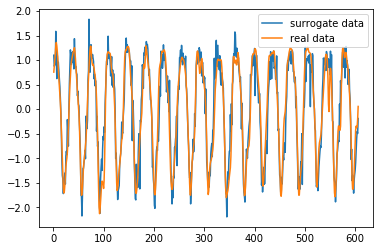

In [1187]:
plt.plot(list(range(1,607)),high_woodland_surrogate_NPT_dict[181413]['N1'], label = 'surrogate data')
plt.plot(list(range(1,607)),test4['ndvi'], label = 'real data')
plt.legend()

In [1091]:
sample_mean = (mean_dek_ndvi_df1.loc[94073]-mean_dek_ndvi_df1.loc[94073].mean())/mean_dek_ndvi_df1.loc[94073].std()

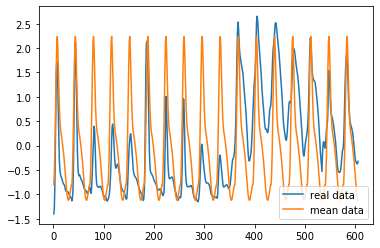

In [1099]:
plt.plot(list(range(1,607)), test2['ndvi'], label = 'real data')
plt.plot(list(range(1,607)), sample_mean, label = 'mean data')
plt.legend(loc=4)

In [1087]:
mean_dek_ndvi_df1.loc[94073]

2002-07-01    0.200238
2002-07-11    0.214857
2002-07-21    0.240579
2002-08-01    0.276916
2002-08-11    0.320364
                ...   
2019-03-11    0.194198
2019-03-21    0.188233
2019-04-01    0.183492
2019-04-11    0.180355
2019-04-21    0.178987
Name: 94073, Length: 606, dtype: float64

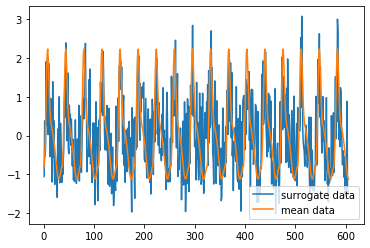

In [1102]:
plt.plot(list(range(1,607)), low_crop_irr_surrogate_NPT_dict[94073]['N2'], label = 'surrogate data')
plt.plot(list(range(1, 607)), sample_mean, label = 'mean data')
plt.legend(loc=4)

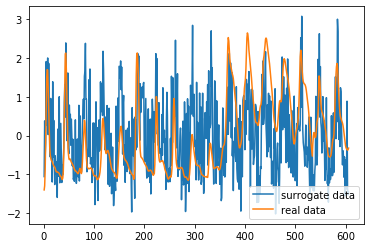

In [1104]:

plt.plot(list(range(1,607)), low_crop_irr_surrogate_NPT_dict[94073]['N2'], label = 'surrogate data')
plt.plot(list(range(1,607)), test2['ndvi'], label = 'real data')
plt.legend(loc=4)

In [1166]:
def simplex_surrogates_df(d, train, test, ed, pi):
    
    simplex_df = pd.DataFrame()
    #for key, value in list(d)[0:3]:
    for x in list(d):
        #print(x)
        key = x
        df = d[x]
        simplex_col = []
        
        dekads_fut = generate_dekads(dekads[-1],pd.datetime(2020,4,30))
        
        for i in range(1,501):
            interim_df = pd.DataFrame({'Time': df['Time'], 'ndvi': df['N' + str(i)], 'precip': df['P' + str(i)], 'temp' : df['T' + str(i)]})
            interim_df.set_index('Time',inplace=True, drop=False)
            
            if max([len(interim_df[interim_df[col].isnull()]) for col in interim_df.columns]) > 20:
                simplex_col.append(np.nan)
                
            else:

                # Check whether column has a few nans
                if interim_df.temp.isnull().values.any():
                    # If so, iterate through nan rows and replace with dekadal mean
                    for t in interim_df[interim_df.temp.isnull()].index:
                        interim_df.temp.loc[t] = interim_df.temp[interim_df.index.strftime('%m-%d') == t.strftime('%m-%d')].mean()
                        #print(interim_df)
                if interim_df.ndvi.isnull().values.any():
                # If so, iterate through nan rows and replace with dekadal mean
                    for t in interim_df[interim_df.ndvi.isnull()].index:
                        interim_df.ndvi.loc[t] = interim_df.ndvi[interim_df.index.strftime('%m-%d') == t.strftime('%m-%d')].mean()

                if interim_df.precip.isnull().values.any():
                # If so, iterate through nan rows and replace with dekadal mean
                    for t in interim_df[interim_df.precip.isnull()].index:
                        interim_df.precip.loc[t] = interim_df.precip[interim_df.index.strftime('%m-%d') == t.strftime('%m-%d')].mean()

                simplex_result = Simplex(dataFrame = interim_df,
                                         lib = train,
                                         pred = test,
                                         E = ed, Tp = pi,
                                         columns = 'ndvi precip temp', target = 'ndvi', showPlot = False)

                # Add datetime index + fix dekad values for future values
                simplex_result.Time = pd.to_datetime(simplex_result.Time)
                simplex_result.set_index(simplex_result.Time, inplace=True)


                # Fix datetime index for future dekads
                simplex_result[-pi:].Time = dekads_fut[1:pi+1]
                error = ComputeError(list(simplex_result.Observations), list(simplex_result.Predictions))


                rho = list(error.values())[2]
                simplex_col.append(rho)
        simplex_df[key] = simplex_col
        
    return simplex_df
        

In [1167]:
low_woodland_surrogate_simplex = simplex_surrogates_df(low_woodland_surrogate_NPT_dict, '1 303', '304 606', 6, 18)

In [1168]:
high_woodland_surrogate_simplex = simplex_surrogates_df(high_woodland_surrogate_NPT_dict, '1 303', '304 606', 6, 18)

^^ using updated surrogates

In [822]:
low_crop_irr_surrogate_simplex = simplex_surrogates_df(low_crop_irr_surrogate_NPT_dict, '1 303', '304 606', 6, 18)

In [ ]:
high_crop_irr_surrogate_simplex = simplex_surrogates_df(high_crop_irr_surrogate_NPT_dict, '1 303', '304 606', 6, 18)

In [834]:
low_crop_rain_surrogate_simplex = simplex_surrogates_df(low_crop_rain_surrogate_NPT_dict, '1 303', '304 606', 6, 18)

In [835]:
high_crop_rain_surrogate_simplex = simplex_surrogates_df(high_crop_rain_surrogate_NPT_dict, '1 303', '304 606', 6, 18)

In [840]:
low_shrubland_surrogate_simplex = simplex_surrogates_df(low_shrubland_surrogate_NPT_dict, '1 303', '304 606', 6, 18)

In [841]:
high_shrubland_surrogate_simplex = simplex_surrogates_df(high_shrubland_surrogate_NPT_dict, '1 303', '304 606', 6, 18)

In [842]:
low_grassland_surrogate_simplex = simplex_surrogates_df(low_grassland_surrogate_NPT_dict, '1 303', '304 606', 6, 18)

In [843]:
high_grassland_surrogate_simplex = simplex_surrogates_df(high_grassland_surrogate_NPT_dict, '1 303', '304 606', 6, 18)

Save out surrogate simplex results

In [827]:
surrogate_simplex_dir = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/surrogate_simplex/'

In [828]:
low_woodland_surrogate_simplex.to_csv(surrogate_simplex_dir + 'low_woodland_surrogate_simplex.csv')

In [829]:
high_woodland_surrogate_simplex.to_csv(surrogate_simplex_dir + 'high_woodland_surrogate_simplex.csv')

In [830]:
low_crop_irr_surrogate_simplex.to_csv(surrogate_simplex_dir + 'low_crop_irr_surrogate_simplex.csv')

In [831]:
high_crop_irr_surrogate_simplex.to_csv(surrogate_simplex_dir + 'high_crop_irr_surrogate_simplex.csv')

In [838]:
low_crop_rain_surrogate_simplex.to_csv(surrogate_simplex_dir + 'low_crop_rain_surrogate_simplex.csv')

In [839]:
high_crop_rain_surrogate_simplex.to_csv(surrogate_simplex_dir + 'high_crop_rain_surrogate_simplex.csv')

In [844]:
low_shrubland_surrogate_simplex.to_csv(surrogate_simplex_dir + 'low_shrubland_surrogate_simplex.csv')

In [845]:
high_shrubland_surrogate_simplex.to_csv(surrogate_simplex_dir + 'high_shrubland_surrogate_simplex.csv')

In [846]:
low_grassland_surrogate_simplex.to_csv(surrogate_simplex_dir + 'low_grassland_surrogate_simplex.csv')

In [847]:
high_grassland_surrogate_simplex.to_csv(surrogate_simplex_dir + 'high_grassland_surrogate_simplex.csv')

# Test for Significance

In [1169]:
def simplex_sig(pixel_ids, surrogate_df, real_df):
    
    p_hat_list = []
    for i in pixel_ids:
        samp = pd.DataFrame(sorted(surrogate_df[i]))
        obs = real_df.loc[real_df.pixel_id == i].skill
        p_hat = 1 - (samp < obs).astype(int).sum()/len(samp)
        
        p_hat_list.append(p_hat[0])
    return p_hat_list
        #print((samp < obs).astype(int).sum()/len(samp))
       # print(obs)[0]

In [1170]:
sig_low_woodland = simplex_sig(low_woodland_sample, low_woodland_surrogate_simplex, lc_pixels_skill)

In [1171]:
sig_high_woodland = simplex_sig(high_woodland_sample, high_woodland_surrogate_simplex, lc_pixels_skill)

In [1175]:
lc_pixels_skill.loc[lc_pixels_skill.pixel_id == 181413]

,pixel_id,LC,skill
57537,181413,woodland,0.921339


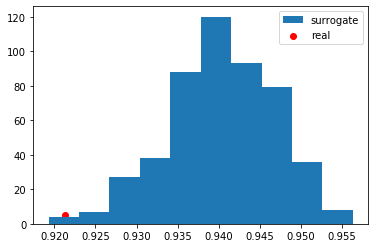

In [1215]:

plt.hist(high_woodland_surrogate_simplex[181413], label = 'surrogate')
plt.scatter(lc_pixels_skill.loc[lc_pixels_skill.pixel_id == 181413]['skill'],5,  c= 'red', label = 'real')
plt.legend()

(array([  9.,  11.,  43.,  64.,  89., 109.,  86.,  57.,  25.,   7.]),
 array([0.20966414, 0.24140261, 0.27314108, 0.30487955, 0.33661801,
        0.36835648, 0.40009495, 0.43183342, 0.46357189, 0.49531036,
        0.52704883]),
 <a list of 10 Patch objects>)

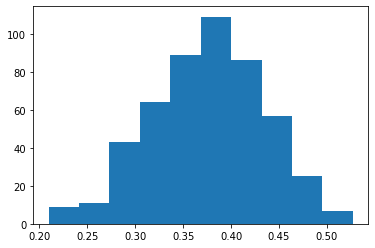

In [1097]:
low_crop_irr_surrogate_simplex[]

In [1070]:
lc_pixels_skill.loc[lc_pixels_skill.pixel_id == 94073]

,pixel_id,LC,skill
7694,94073,cropland_irrigated,-0.062008


In [1065]:
sig_low_crop_irr = simplex_sig(low_crop_irr_sample, low_crop_irr_surrogate_simplex, lc_pixels_skill)

In [1020]:
high_woodland_surrogate_simplex_month

,181413,324912,199513,162142,173853,177908,129118,193665,143109,167428,...,305090,113133,126158,191928,306245,107321,135512,100901,173588,186097
0,0.942580,0.837347,0.879007,0.960488,0.958834,0.944004,0.966196,0.892558,0.970151,0.954046,...,0.836175,0.897300,0.945939,0.912751,0.840072,0.869897,0.972803,0.775424,0.786267,0.916497
1,0.934914,0.864713,0.843894,0.951123,0.957269,0.962748,0.962029,0.896757,0.971344,0.956599,...,0.872107,0.906620,0.936884,0.919824,0.820556,0.815039,0.966224,0.863286,0.784181,0.905827
2,0.946117,0.849317,0.870232,0.946320,0.956657,0.952751,0.957583,0.915324,0.968423,0.961434,...,0.880498,0.891511,0.937638,0.917908,0.863503,0.855320,0.971708,0.844230,0.842285,0.901375
3,0.933850,0.872220,0.851298,0.946017,0.956602,0.952092,0.960508,0.926645,0.967599,0.955662,...,0.865646,0.896220,0.950913,0.929048,0.848328,0.883388,0.963814,0.812428,0.824006,0.907272
4,0.952884,0.841772,0.867322,0.946952,0.955847,0.954879,0.963159,0.897285,0.959867,0.961048,...,0.869003,0.913909,0.941104,0.903393,0.846583,0.871870,0.973859,0.831910,0.787330,0.908745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.923179,0.854005,0.837726,0.957853,0.964115,0.950500,0.957174,0.898624,0.968885,0.959603,...,0.861585,0.910331,0.939742,0.928761,0.852609,0.869053,0.973404,0.782463,0.786809,0.926470
496,0.934385,0.833787,0.841415,0.953761,0.953059,0.958818,0.956396,0.900300,0.960488,0.955041,...,0.864156,0.912191,0.945366,0.919520,0.823617,0.864075,0.973974,0.807055,0.803274,0.915182
497,0.930844,0.846257,0.828145,0.953794,0.961038,0.944753,0.963629,0.873780,0.975519,0.951658,...,0.857966,0.924151,0.951128,0.927672,0.835460,0.842942,0.972599,0.817248,0.810576,0.872248
498,0.937116,0.869020,0.843975,0.953842,0.960626,0.960354,0.954874,0.906374,0.962951,0.959394,...,0.873198,0.947031,0.937070,0.909673,0.824634,0.863571,0.966603,0.817352,0.802175,0.915087


In [859]:
lc_pixels_skill.loc[lc_pixels_skill['pixel_id'].isin(low_woodland_sample)]

,pixel_id,LC,skill
14809,110538,woodland,0.186696
28392,136790,woodland,0.174840
40459,155911,woodland,0.185137
59696,184494,woodland,0.198001
59698,184496,woodland,0.168512
...,...,...,...
103942,316893,woodland,-0.013475
104044,317477,woodland,0.018067
104731,320976,woodland,0.189058
107628,337871,woodland,0.010223


# EXTRA

In [ ]:
def make_surrogate_data(mean_dek_df, anom_dek_df):
    
    surr_list = pd.DataFrame()
    
    i = 0
    while i < 500:
        surr = mean_dek_df + sample(list(anom_dek_df), len(anom_dek_df))
        surr_list[i] = surr.values
        i +=1
    return surr_list
    
       

In [ ]:
def ccm_surrogate(df, E, tau, Tp):
    ccm_out = []
    for i in range(1,501):
        targetcol = 'P' + str(i)
        #print(targetcol)
        ccm_result = CCM(dataFrame= df, E = E, tau = tau, Tp = Tp, libSizes = '600 600 10', sample = 1, columns = 'NDVI', target = targetcol, verbose = True, showPlot = False)
        col = ccm_result['NDVI:'+targetcol]
        ccm_out.append(col.values[0])
    return ccm_out
    

# Run CCM on surrogate data and combine into results dataframe

In [ ]:
def ccm_surrogates_df(d, E, tau, Tp, var):
    
    ccm_df = pd.DataFrame()
    #for key, value in list(d)[0:3]:
    for x in list(d)[0:20]:
        print(x)
        key = x
        df = d[x]
        ccm_col = []
        
        for i in range(1,501):
            targetcol = var + str(i)
        #print(targetcol)
            ccm_result = CCM(dataFrame= df, E = E, tau = tau, Tp = Tp, libSizes = '600 600 10', sample = 1, columns = 'NDVI', target = targetcol, verbose = True, showPlot = False)
            col = ccm_result['NDVI:'+targetcol]
            ccm_col.append(col.values[0])
            
        ccm_df[key] = ccm_col
    return ccm_df
        #print(ccm_col)
    #return pd.DataFrame(ccm_out)

# Make Real Data Dictionary

In [ ]:
def make_real_data_dict(ndvi_table, var_table, pixel_ids, var):
   
    d = {}
    
    for i in pixel_ids:
        joined_data = pd.concat([ndvi_table['Time'], ndvi_table[i], var_table[i]], axis =1)
        joined_data.columns = ['Time', 'NDVI', var]
        d[i] = joined_data
    return d
        

# Run CCM on real data

In [ ]:
def ccm_real_df(d, E, tau, Tp, var):
    
    ccm_df = pd.DataFrame()
    
    for x in list(d):
        key = x
        df = d[x]
        ccm_result = CCM(dataFrame= df, E = E, tau = tau, Tp = Tp, libSizes = '600 600 10', sample = 1, columns = 'NDVI', target = var, verbose = True, showPlot = False)
        col = ccm_result['NDVI:' + var]
        
        ccm_df[key] = [col.values[0]]
    return ccm_df

In [ ]:
low_woodland_real_dict = make_real_data_dict(ndvi_tableT, precip_tableT, low_woodland_sample, 'P')

In [1044]:
test_df = pd.DataFrame({'Time': dekads, 'ndvi': ndvi_table.loc[181413], 'precip': precip_table.loc[181413], 'temp': temp_table.loc[181413]})

In [1046]:
test_df['ndvi'] = (test_df['ndvi']-100)/100

In [1048]:
test_df['ndvi'] = (test_df['ndvi']- test_df['ndvi'].mean())/test_df['ndvi'].std()

In [1050]:
test_df['precip'] = (test_df['precip'] - test_df['precip'].mean())/test_df['precip'].std()
test_df['temp'] = (test_df['temp'] - test_df['temp'].mean())/test_df['temp'].std()

In [1055]:
test_df.isnull().values.any()

False

In [1060]:
simplex_result = Simplex(dataFrame = test_df,
                                 lib = '1 303',
                                 pred = '304 606',
                                 E = 6, Tp = 18,
                                 columns = 'ndvi precip temp', target = 'ndvi', showPlot = False)

In [1062]:
ComputeError(list(simplex_result.Observations), list(simplex_result.Predictions))

{'MAE': 0.3014588471162067,
 'RMSE': 0.39179347293065975,
 'rho': 0.9213386581403257}

In [1159]:
def create_test_df(pixel_id):
    test_df = pd.DataFrame({'Time': dekads, 'ndvi': ndvi_table.loc[pixel_id], 'precip': precip_table.loc[pixel_id], 'temp': temp_table.loc[pixel_id]})
    test_df['ndvi'] = (test_df['ndvi']-100)/100
    test_df['ndvi'] = (test_df['ndvi']- test_df['ndvi'].mean())/test_df['ndvi'].std()
    test_df['precip'] = (test_df['precip'] - test_df['precip'].mean())/test_df['precip'].std()
    test_df['temp'] = (test_df['temp'] - test_df['temp'].mean())/test_df['temp'].std()
    
    return test_df

In [1164]:
test5 = create_test_df(213622)

In [1160]:
test4 = create_test_df(181413)

In [1124]:
test3 = create_test_df(94073)

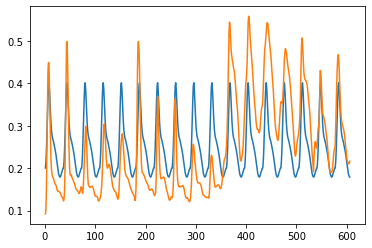

In [1130]:
plt.plot(list(range(1,607)),mean_dek_ndvi_df1.loc[94073])
plt.plot(list(range(1,607)), test3['ndvi'])

In [1074]:
test2 = create_test_df(94073)

In [1075]:
simplex2 = Simplex(dataFrame = test2,
                                 lib = '1 303',
                                 pred = '304 606',
                                 E = 6, Tp = 18,
                                 columns = 'ndvi precip temp', target = 'ndvi', showPlot = False)

In [1076]:
ComputeError(list(simplex2.Observations), list(simplex2.Predictions))

{'MAE': 1.5187745900991714,
 'RMSE': 1.7703195912463483,
 'rho': -0.062007878866497036}

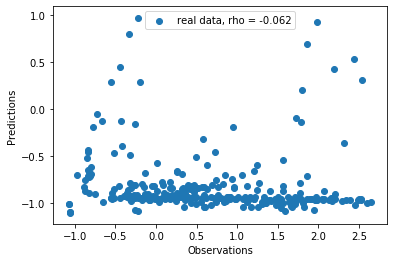

In [1121]:
plt.scatter(simplex2.Observations, simplex2.Predictions, label = 'real data, rho = -0.062')
plt.xlabel('Observations')
plt.ylabel('Predictions')
plt.legend()

In [1107]:
surrogate_test = pd.DataFrame({'Time': dekads, 'ndvi':low_crop_irr_surrogate_NPT_dict[94073]['N2'], 'precip': low_crop_irr_surrogate_NPT_dict[94073]['P2'], 'temp': low_crop_irr_surrogate_NPT_dict[94073]['T2']})

In [1108]:
surrogate_test

,Time,ndvi,precip,temp
0,2002-07-01,-1.056516,1.322067,0.225308
1,2002-07-11,0.381087,2.863781,-0.452539
2,2002-07-21,-0.527253,2.245730,-1.634925
3,2002-08-01,-0.162577,1.789686,-1.443862
4,2002-08-11,1.912662,2.095510,-1.121234
...,...,...,...,...
601,2019-03-11,-1.377598,-0.609942,-0.204879
602,2019-03-21,0.889407,-0.609942,1.994256
603,2019-04-01,-1.345350,0.026869,1.176586
604,2019-04-11,-1.527350,-0.600481,1.144694


In [1111]:
surrogate_simplex = Simplex(dataFrame = surrogate_test,
                                 lib = '1 303',
                                 pred = '304 606',
                                 E = 6, Tp = 18,
                                 columns = 'ndvi precip temp', target = 'ndvi', showPlot = False)

In [1112]:
ComputeError(list(surrogate_simplex.Observations), list(surrogate_simplex.Predictions))

{'MAE': 0.7965391774763076,
 'RMSE': 0.9443501982635927,
 'rho': 0.4282380139655041}

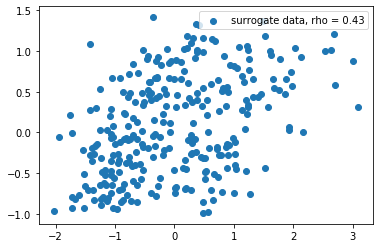

In [1119]:
plt.scatter(surrogate_simplex.Observations, surrogate_simplex.Predictions, label = 'surrogate data, rho = 0.43')
plt.legend()

In [1217]:
surrogate_test2 = pd.DataFrame({'Time': dekads, 'ndvi':high_woodland_surrogate_NPT_dict[181413]['N2'], 'precip': high_woodland_surrogate_NPT_dict[181413]['P2'], 'temp': high_woodland_surrogate_NPT_dict[181413]['T2']})

In [1220]:
surrogate_simplex2 = Simplex(dataFrame = surrogate_test2,
                                 lib = '1 303',
                                 pred = '304 606',
                                 E = 6, Tp = 18,
                                 columns = 'ndvi precip temp', target = 'ndvi', showPlot = False)

In [1221]:
ComputeError(list(surrogate_simplex2.Observations), list(surrogate_simplex2.Predictions))

{'MAE': 0.2646729895185231,
 'RMSE': 0.35304480884767014,
 'rho': 0.9377755063112707}

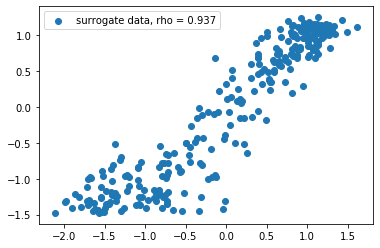

In [1224]:
plt.scatter(surrogate_simplex2.Observations, surrogate_simplex2.Predictions, label = 'surrogate data, rho = 0.937')
plt.legend()

In [1222]:
simplex_test4 = Simplex(dataFrame = test4,
                                 lib = '1 303',
                                 pred = '304 606',
                                 E = 6, Tp = 18,
                                 columns = 'ndvi precip temp', target = 'ndvi', showPlot = False)

In [1223]:
ComputeError(list(simplex_test4.Observations), list(simplex_test4.Predictions))

{'MAE': 0.3014588471162067,
 'RMSE': 0.39179347293065975,
 'rho': 0.9213386581403257}

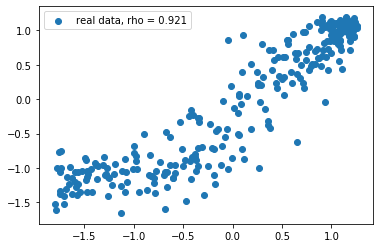

In [1226]:
plt.scatter(simplex_test4.Observations, simplex_test4.Predictions, label = 'real data, rho = 0.921')
plt.legend()